## 0.哪3组概念？
- 1.评价指标
- 2.欠拟合/过拟合
- 3.gridsearch/cross validation

## 1.机器学习项目的目标是什么

- 针对具体问题定义一个评估指标（准确率/召回率/AUC/RMSE/NDCG。。。。）
- 使用现有数据训练一个好的模型

## 2.一个好的机器学习模型有哪些标准

- 在现有数据上评估指标高
- 在未来可能见到的数据上评估指标高

## 3.什么是过拟合

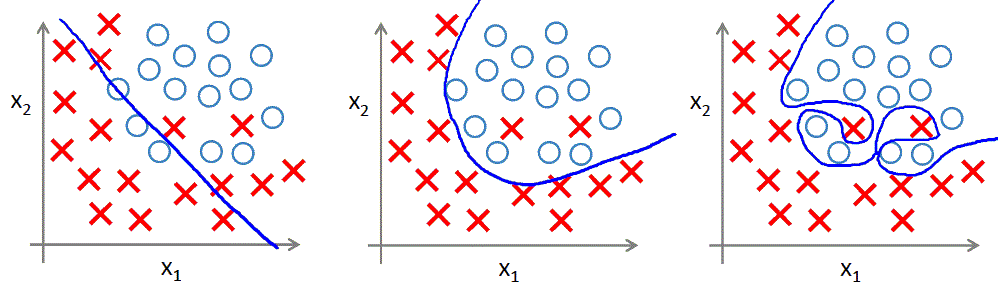
从左到右分别是：欠拟合，好拟合，过拟合

过拟合的本质：模型把数据中的噪声当作细节进行了学习

## 4.为什么会发生过拟合

- 数据噪声
- 模型复杂度高

## 5.如何抑制过拟合

- 过拟合无法彻底消灭
- 分train/test数据集
- 选择合适的模型参数
- 增加正则化（暂不深究正则化的理论，只要了解有参数可调即可）

## 6.什么是gridsearch和cross validation

- gridsearch：对多个可调参数的多个备选值的组合每个都试一遍
- cross validation：把数据集分成N份，做N次实验。每次用其中一份做test，其他做train

### Ref
sklearn相关文档：https://scikit-learn.org/stable/model_selection.html#model-selection

## 7.实例体会过拟合

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

# 让结果在notebook中显示
%matplotlib inline

# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [23]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')  
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])

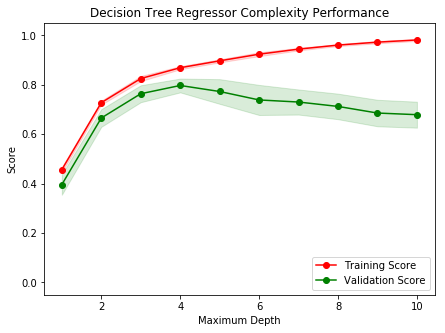

In [26]:
ModelComplexity(features, prices)

## 总结
- 1.评价指标
- 2.过拟合
- 3.gridsearch/cross validation
- 4.TODO: 安装anaconda，看代码 https://www.kaggle.com/search?q=boston+housing+in%3Anotebooks 积累pandas,numpy各种数据处理技巧，

## 后续内容预告
- 评估指标对比
- 数据处理总结
- 模型在不同领域的应用
- kaggle实战